In [1]:
!pip install gdown
import gdown

**1) Importing Dataset**

In [2]:
dataset = '1GCmHooX1xOvyIsvdDvGrMBzmJeC4zB0D'
url = f'https://drive.google.com/uc?id={dataset}'
output_path = '/dataset.csv'
gdown.download(url, output_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1GCmHooX1xOvyIsvdDvGrMBzmJeC4zB0D
To: /dataset.csv
100%|██████████| 3.75M/3.75M [00:00<00:00, 132MB/s]


'/dataset.csv'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

**2) Statistics of Data**

In [4]:
data = pd.read_csv(output_path)
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [5]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


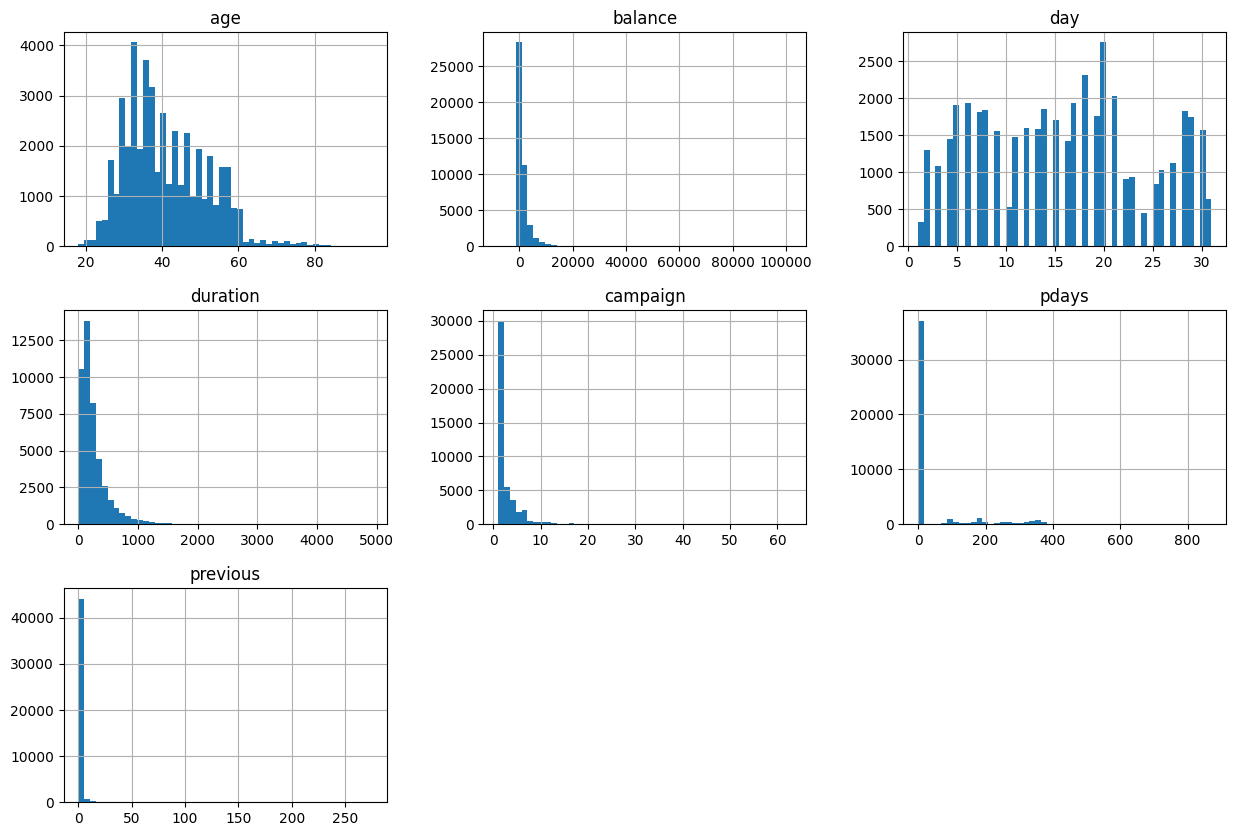

In [8]:
data.hist(bins=50, figsize=(15, 10))
plt.show()

In [9]:
numerical_columns = data.select_dtypes(include=['number']).columns

for column in numerical_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

In [10]:
data[numerical_columns].skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

In [11]:
data[numerical_columns].kurtosis()

age            0.319570
balance      140.751547
day           -1.059897
duration      18.153915
campaign      39.249651
pdays          6.935195
previous    4506.860660
dtype: float64

<Axes: >

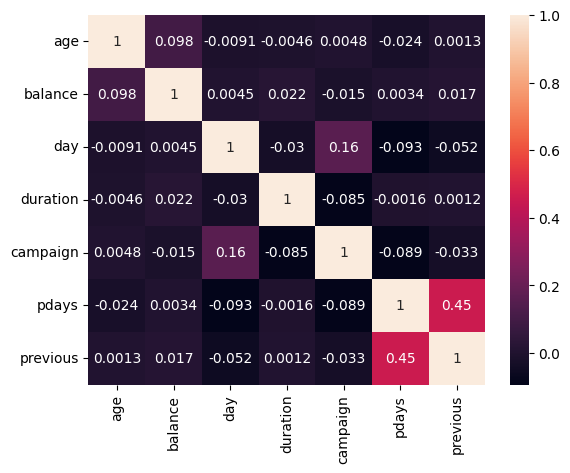

In [12]:
corrmat = data[numerical_columns].corr()
round(corrmat,2)
sns.heatmap(corrmat, annot=True)

In [13]:
print(data['job'].value_counts())

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64


**3) Data Analytics of Dataset**

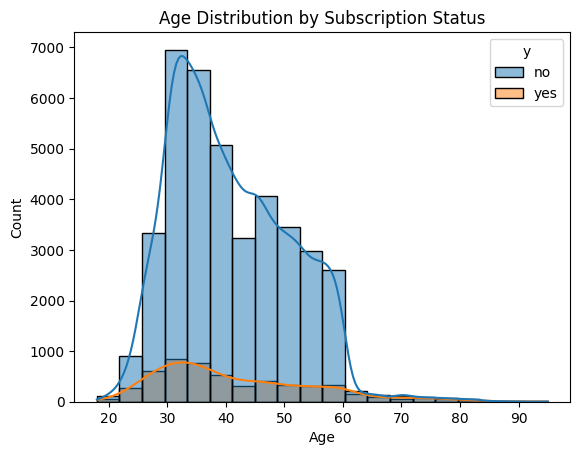

In [14]:
# 1) Distribution of client ages and their subscription status

sns.histplot(data=data, x='age', hue='y', bins=20, kde=True)
plt.title('Age Distribution by Subscription Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

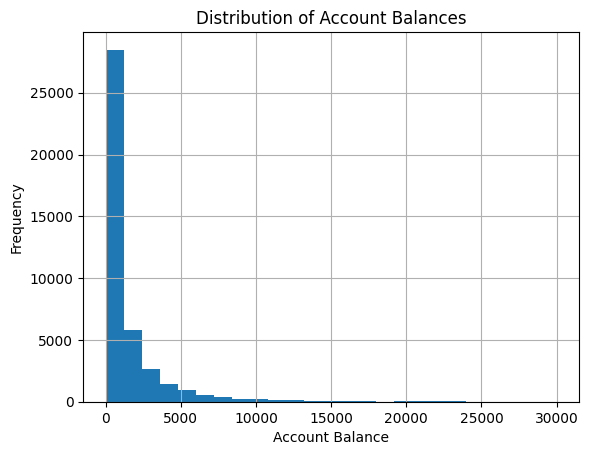

In [15]:
# 2) Distribution of account balances

data['balance'].hist(bins=25, range=(0, 30000))
plt.xlabel('Account Balance')
plt.ylabel('Frequency')
plt.title('Distribution of Account Balances')
plt.show()

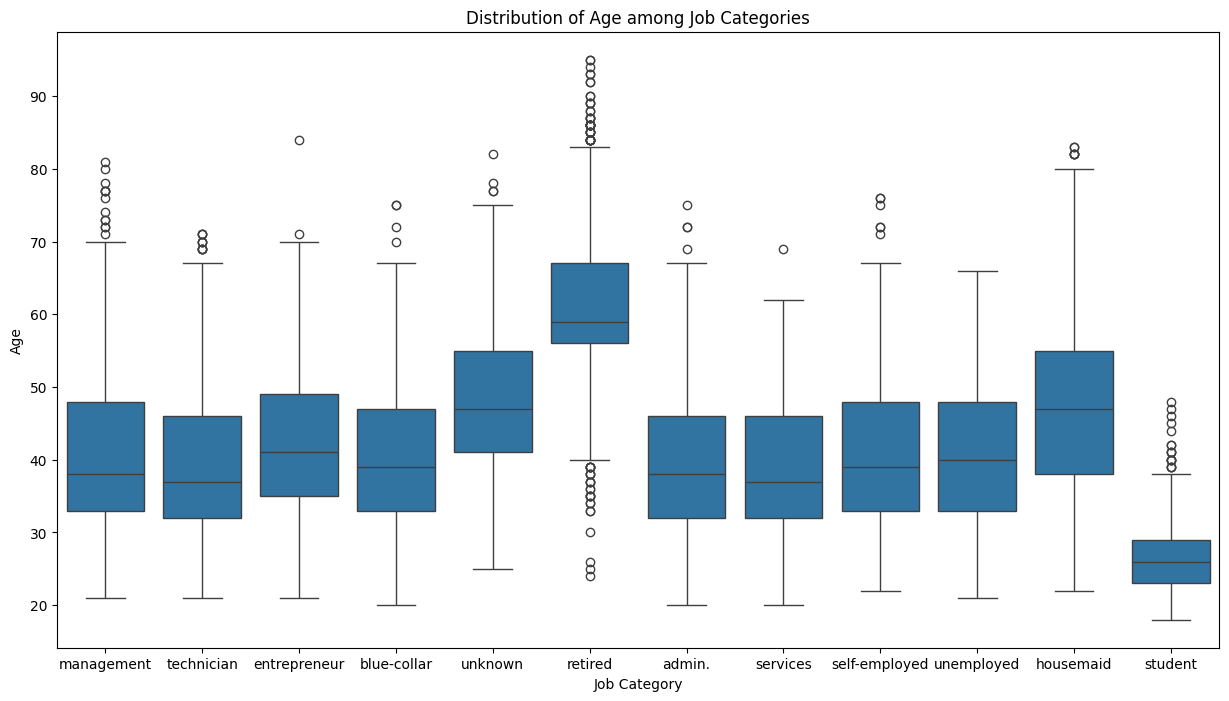

In [16]:
# 3) Distribution of age among different job categories

plt.figure(figsize=(15, 8))
sns.boxplot(x='job', y='age', data=data)
plt.xlabel('Job Category')
plt.ylabel('Age')
plt.title('Distribution of Age among Job Categories')
plt.show()

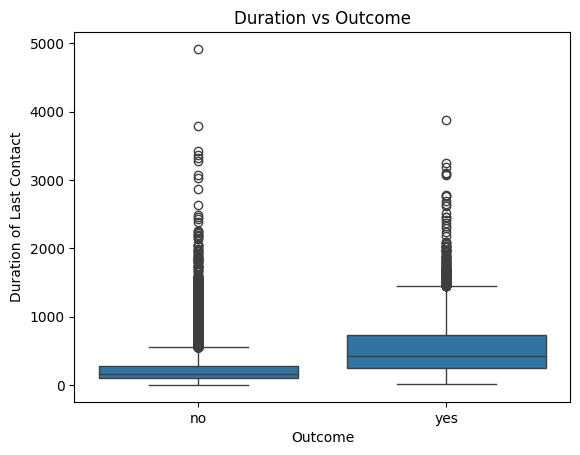

In [17]:
# 4) Relationship between duration and outcome

sns.boxplot(x='y', y='duration', data=data)
plt.xlabel('Outcome')
plt.ylabel('Duration of Last Contact')
plt.title('Duration vs Outcome')
plt.show()

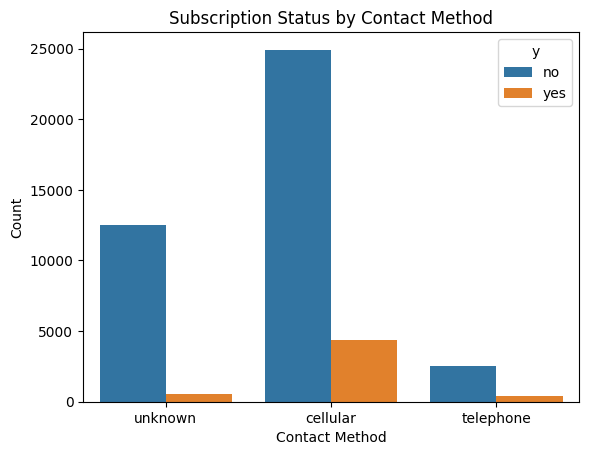

In [18]:
# 5) Contact method and subscription

sns.countplot(x='contact', hue='y', data=data)
plt.title('Subscription Status by Contact Method')
plt.xlabel('Contact Method')
plt.ylabel('Count')
plt.show()

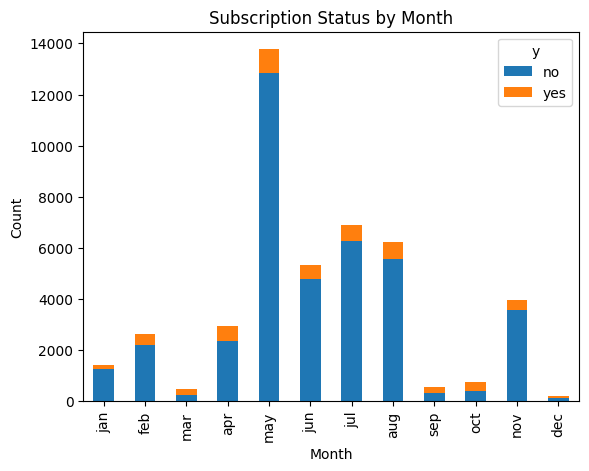

In [19]:
# 6) Months and subscription

month_subscription = data.groupby(['month', 'y']).size().unstack()
month_subscription = month_subscription.reindex(
    ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
)
month_subscription.plot(kind='bar', stacked=True)
plt.title('Subscription Status by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

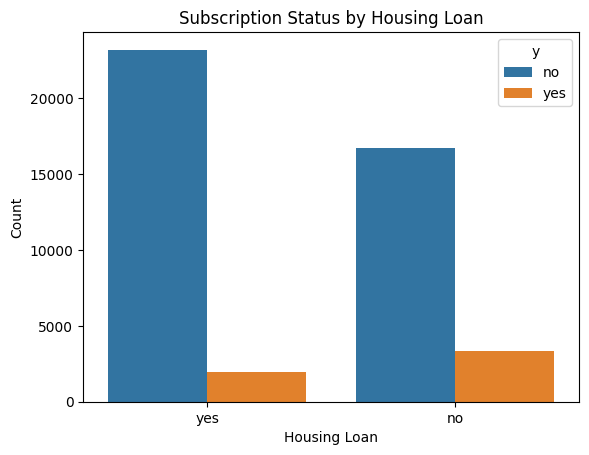

In [20]:
# 7) Housing loan and subscription

sns.countplot(x='housing', hue='y', data=data)
plt.title('Subscription Status by Housing Loan')
plt.xlabel('Housing Loan')
plt.ylabel('Count')
plt.show()

In [21]:
# 8) Correlation between age and account balance

correlation_age_balance = data['age'].corr(data['balance'])
print(f"Correlation between Age and Balance: {correlation_age_balance}")

Correlation between Age and Balance: 0.09778273937134754


In [22]:
# 9) Correlation between number of campaign and outcome

correlation_contacts_outcome = data['campaign'].corr(data['y'].apply(lambda x: 1 if x == 'yes' else 0))
print(f"Correlation between Campaign and Outcome: {correlation_contacts_outcome}")

Correlation between Campaign and Outcome: -0.07317200634586699


In [23]:
# 10) Chi-square test for marital status and subscription

contingency_table_marital = pd.crosstab(data['marital'], data['y'])
chi2, p, _, _ = chi2_contingency(contingency_table_marital)
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-square value: 196.49594565603957
P-value: 2.1450999986791792e-43


In [24]:
# 11) Conditional probability of subscribing given a housing loan

total_with_loan = data[data['loan'] == 'yes'].shape[0]
subscribed_with_loan = data[(data['loan'] == 'yes') & (data['y'] == 'yes')].shape[0]

conditional_prob = subscribed_with_loan / total_with_loan
print(f"Conditional Probability of Subscribing given Housing Loan: {conditional_prob:.2%}")

Conditional Probability of Subscribing given Housing Loan: 6.68%


In [25]:
# 12) Contingency table for job and subscription

contingency_table_job = pd.crosstab(data['job'], data['y'])

conditional_prob_job = contingency_table_job.div(contingency_table_job.sum(axis=1), axis=0)

print("Conditional Probability of Subscribing to a Term Deposit Given Job:-")
print(conditional_prob_job)

Conditional Probability of Subscribing to a Term Deposit Given Job:-
y                    no       yes
job                              
admin.         0.877973  0.122027
blue-collar    0.927250  0.072750
entrepreneur   0.917283  0.082717
housemaid      0.912097  0.087903
management     0.862444  0.137556
retired        0.772085  0.227915
self-employed  0.881571  0.118429
services       0.911170  0.088830
student        0.713220  0.286780
technician     0.889430  0.110570
unemployed     0.844973  0.155027
unknown        0.881944  0.118056


In [26]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**4) Encoding of Variables**

In [27]:
le = LabelEncoder()

In [28]:
data["job"] = le.fit_transform(data["job"])
data["marital"] = le.fit_transform(data["marital"])
data["education"] = le.fit_transform(data["education"])
data["default"] = le.fit_transform(data["default"])
data["housing"] = le.fit_transform(data["housing"])
data["loan"] = le.fit_transform(data["loan"])
data["contact"] = le.fit_transform(data["contact"])
data["y"] = le.fit_transform(data["y"])

data.drop(["day" , "month" , "campaign", "pdays", "previous", "poutcome"] , axis=1 , inplace=True)

In [29]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,y
0,58,4,1,2,0,2143,1,0,2,261,0
1,44,9,2,1,0,29,1,0,2,151,0
2,33,2,1,1,0,2,1,1,2,76,0
3,47,1,1,3,0,1506,1,0,2,92,0
4,33,11,2,3,0,1,0,0,2,198,0


**5) Model Training and Evaluation**

In [30]:
# Train Test Splitting

X = data[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'duration']]
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [31]:
from sklearn.metrics import confusion_matrix

lr = LogisticRegression()
dt = DecisionTreeClassifier()
svc = SVC(probability=True)
knn = KNeighborsClassifier()

for model in [lr, dt, svc, knn]:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    accuracy_percentage = accuracy * 100
    cm = confusion_matrix(y_test, predictions)

    print("---------------------------------------")
    print(model)
    print("Accuracy:", round(accuracy_percentage, 2), "%")
    print("Precision:", round(precision, 2))
    print("Recall:", round(recall, 2))
    print("F1 Score:", round(f1, 2))
    print("Confusion Matrix:", cm)
    print("---------------------------------------")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


---------------------------------------
LogisticRegression()
Accuracy: 88.97 %
Precision: 0.56
Recall: 0.19
F1 Score: 0.29
Confusion Matrix: [[7847  158]
 [ 839  199]]
---------------------------------------
---------------------------------------
DecisionTreeClassifier()
Accuracy: 85.16 %
Precision: 0.37
Recall: 0.4
F1 Score: 0.38
Confusion Matrix: [[7282  723]
 [ 619  419]]
---------------------------------------
---------------------------------------
SVC(probability=True)
Accuracy: 88.53 %
Precision: 0.54
Recall: 0.01
F1 Score: 0.01
Confusion Matrix: [[7999    6]
 [1031    7]]
---------------------------------------
---------------------------------------
KNeighborsClassifier()
Accuracy: 87.89 %
Precision: 0.44
Recall: 0.21
F1 Score: 0.28
Confusion Matrix: [[7735  270]
 [ 825  213]]
---------------------------------------


In [32]:
# Make predictions and calculate probabilities

probs_lr = lr.predict_proba(X_test)[:, 1]
probs_dt = dt.predict_proba(X_test)[:, 1]
probs_svc = svc.predict_proba(X_test)[:, 1]
probs_knn = knn.predict_proba(X_test)[:, 1]

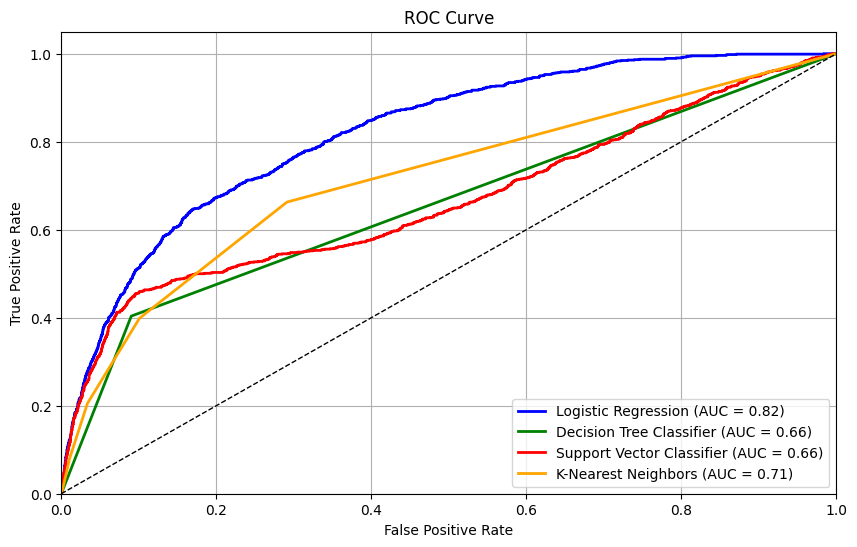

In [33]:
# Calculate ROC curve and AUC for logistic regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, probs_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Calculate ROC curve and AUC for decision tree classifier
fpr_dt, tpr_dt, _ = roc_curve(y_test, probs_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Calculate ROC curve and AUC for SVC
fpr_svc, tpr_svc, _ = roc_curve(y_test, probs_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

# Calculate ROC curve and AUC for KNClassifier
fpr_knn, tpr_knn, _ = roc_curve(y_test, probs_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve for all models
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label='Decision Tree Classifier (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_svc, tpr_svc, color='red', lw=2, label='Support Vector Classifier (AUC = %0.2f)' % roc_auc_svc)
plt.plot(fpr_knn, tpr_knn, color='orange', lw=2, label='K-Nearest Neighbors (AUC = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()